In [2]:
import pandas as pd
import numpy  as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train =pd.read_csv('C:\\Users\\Edosomwan Oghogho\\Desktop\\Py-DS-ML-Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\13-Logistic-Regression\\loan_train.csv')

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


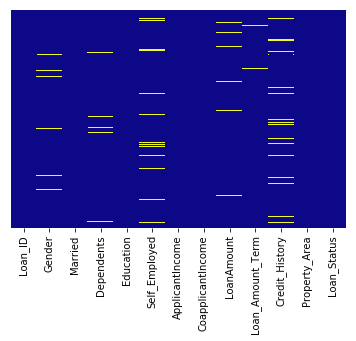

In [7]:
# visualizing to see missing vlaues
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='plasma')

In [8]:
sns.set_style('whitegrid')

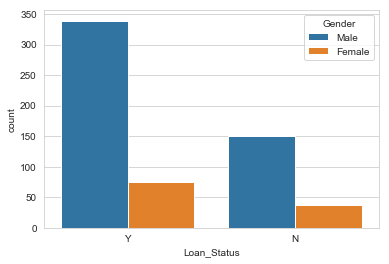

In [9]:
sns.countplot(x='Loan_Status',hue='Gender',data=train)

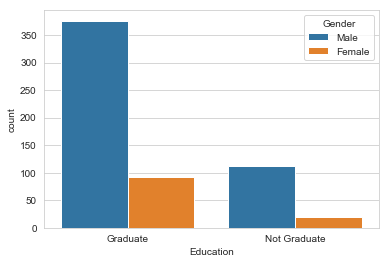

In [10]:
sns.countplot(x='Education',hue='Gender',data=train)

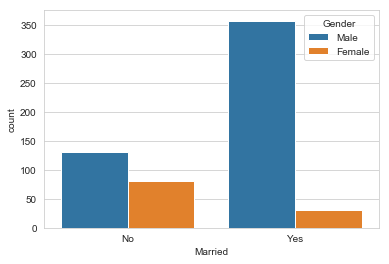

In [11]:
sns.countplot(x='Married',hue='Gender',data=train)

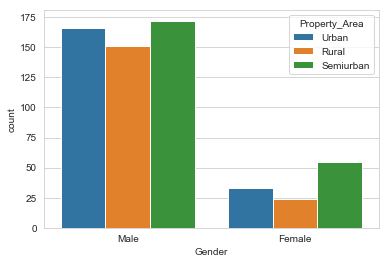

In [12]:
sns.countplot(x='Gender',hue='Property_Area',data=train)

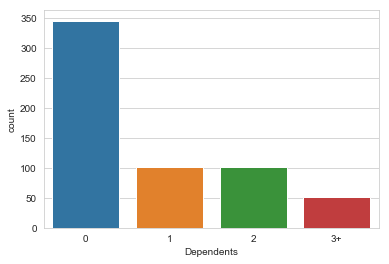

In [13]:
sns.countplot(x='Dependents',data=train)

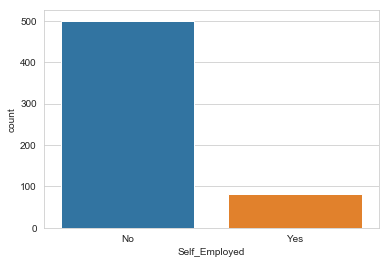

In [14]:
sns.countplot(x='Self_Employed',data=train)

# Replacing missing values

In [15]:
#replacing missing loan amount with mean
loanamount=train['LoanAmount'].mean()
train['LoanAmount'].replace(np.nan, loanamount, inplace=True)

In [16]:
#replacing missing loan amount term with mean
loanamountterm=train['Loan_Amount_Term'].mean()
train['Loan_Amount_Term'].replace(np.nan, loanamountterm, inplace=True)

In [17]:
#replacing missing credit history with 0 occured most
credithistory= 0
train['Credit_History'].replace(np.nan, credithistory, inplace=True)

In [18]:
gender= 'Male'
train['Gender'].replace(np.nan, gender, inplace=True)

In [19]:
married= 'Yes'
train['Married'].replace(np.nan, married, inplace=True)

In [20]:
dependents= 3
train['Dependents'].replace('3+', dependents, inplace=True)

In [21]:
dependents= 0
train['Dependents'].replace(np.nan, dependents, inplace=True)

In [22]:
selfemployed= 'No'
train['Self_Employed'].replace(np.nan, selfemployed, inplace=True)

In [23]:
train['Dependents']=train['Dependents'].astype("int")

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null int32
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 60.0+ KB


In [25]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Creating a dummy variable 

Nominal variables, or variables that describe a characteristic using two or more categories, are commonplace in quantitative research, but are not always useable in their categorical form.Dummy coding is a way of incorporating nominal variables into regression analysis. coverting categories to 0 and 1
However,we cannot use both categories that is;yes or no.
Doing so would give the regression redundant information, result in multicollinearity, and break the model. 
This means we have to leave one category out, and we call this missing category the reference category. (drop_first=True)
Using the reference category makes all interpretation in reference to that category

In [26]:
gender= pd.get_dummies(train['Gender'],drop_first=True)

In [29]:
married= pd.get_dummies(train['Married'],drop_first=True)

In [31]:
education= pd.get_dummies(train['Education'],drop_first=True)

In [33]:
self_employed= pd.get_dummies(train['Self_Employed'],drop_first=True)

In [35]:
property_area= pd.get_dummies(train['Property_Area'],drop_first=True)

In [40]:
loan_status= pd.get_dummies(train['Loan_Status'],drop_first=True)

In [42]:
train=pd.concat([train,gender,married, education,self_employed,property_area,loan_status],axis=1)

In [43]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0,0,1,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,1,0,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,1,0,1,0,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,1,1,0,0,1,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0,0,1,1


In [44]:
#dropping variables changed
train.drop(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],axis=1, inplace=True)

In [45]:
train.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
0,LP001002,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1,1
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0
2,LP001005,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1,1
3,LP001006,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,1
4,LP001008,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1,1


In [46]:
train.columns

Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Male', 'Yes',
       'Not Graduate', 'Yes', 'Semiurban', 'Urban', 'Y'],
      dtype='object')

In [48]:
#Renaming dummy columns
train.rename(columns = {'Male': 'gender', 'Yes': 'married', 'Not Graduate':'education','Yes':'self_employed','Y':'loan_status'}, inplace=True)

In [54]:
train.drop(['Loan_ID'], axis=1, inplace=True)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Dependents           614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
gender               614 non-null uint8
self_employed        614 non-null uint8
education            614 non-null uint8
self_employed        614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
loan_status          614 non-null uint8
dtypes: float64(4), int32(1), int64(1), uint8(7)
memory usage: 30.7 KB


# Train test Split

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [57]:
train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'gender', 'self_employed',
       'education', 'self_employed', 'Semiurban', 'Urban', 'loan_status'],
      dtype='object')

In [58]:
x=train[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'gender', 'self_employed',
       'education', 'self_employed', 'Semiurban', 'Urban']]
y=train['loan_status']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [60]:
logmodel=LogisticRegression()

In [61]:
logmodel.fit(X_train, y_train)

C:\Users\Edosomwan Oghogho\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
predictions=logmodel.predict(X_test)

In [63]:
logmodel.coef_

array([[ 7.80244115e-02, -1.62084019e-05, -1.77234898e-05,
        -4.64530065e-05, -1.26760843e-03,  1.78508036e+00,
        -2.79853845e-01,  2.41502084e-01, -3.41274322e-02,
        -2.74291657e-01,  2.41502084e-01, -3.41274322e-02,
         6.08051995e-01, -7.45092264e-02]])

In [64]:
logmodel.intercept_

array([-0.10949739])

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.38      0.52        65
           1       0.74      0.94      0.83       120

   micro avg       0.75      0.75      0.75       185
   macro avg       0.76      0.66      0.67       185
weighted avg       0.75      0.75      0.72       185



In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
cnf_matrix=confusion_matrix(y_test, predictions)
cnf_matrix

array([[ 25,  40],
       [  7, 113]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

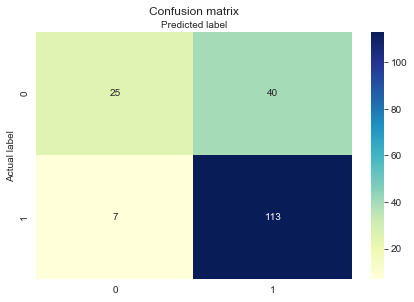

In [75]:
#Visualizing confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
from sklearn import metrics

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.745945945945946
Precision: 0.738562091503268
Recall: 0.9416666666666667


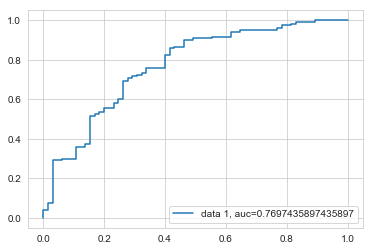

In [78]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()